In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
# from prophet import Prophet

In [102]:
# !pip install yfinance prophet

In [2]:
# Read the data
data = pd.read_csv("dataset_mood_smartphone.csv",delimiter=',')
# drop a column
data = data.drop(['Unnamed: 0'],axis=1)
# print the data
data

,id,time,variable,value
0,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...
376907,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
376908,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
376909,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
376910,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


In [3]:
data[data.duplicated()]

,id,time,variable,value
7392,AS14.12,2014-03-30 11:00:00.000,circumplex.arousal,-1.0
10259,AS14.28,2014-04-16 17:00:00.000,circumplex.arousal,1.0
11472,AS14.01,2014-04-27 20:00:00.000,circumplex.valence,1.0
11869,AS14.03,2014-05-03 11:00:00.000,circumplex.valence,1.0
15043,AS14.24,2014-05-11 11:00:00.000,circumplex.valence,1.0
15253,AS14.25,2014-04-27 11:00:00.000,circumplex.valence,0.0


In [4]:
data = data.drop_duplicates()

In [5]:
# convert time column to datetime
data['time'] = pd.to_datetime(data['time'])

# create a new column 'monthly_date' with monthly date values
data['date'] = data['time'].dt.to_period('d')

C:\Users\Payanshi\AppData\Local\Temp\ipykernel_5504\677253721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time'] = pd.to_datetime(data['time'])
C:\Users\Payanshi\AppData\Local\Temp\ipykernel_5504\677253721.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = data['time'].dt.to_period('d')


In [6]:
cat1 = data[data['variable'].isin(['activity','call','sms'])].reset_index(drop=True)
cat2 = data[np.logical_not(data['variable'].isin(['activity','call','sms']))].reset_index(drop=True)

agg_cat1 = cat1.groupby(['id','variable','date']).median().reset_index()
agg_cat2 = cat2.groupby(['id','variable','date']).mean().reset_index()

data_agg = pd.concat([agg_cat1, agg_cat2], axis=0)

data_agg.reset_index(inplace=True, drop=True)
data_agg

,id,variable,date,time,value
0,AS14.01,activity,2014-03-20,2014-03-20 22:30:00.000000000,0.081548
1,AS14.01,activity,2014-03-21,2014-03-21 11:00:00.000000000,0.032787
2,AS14.01,activity,2014-03-22,2014-03-22 15:30:00.000000000,0.260593
3,AS14.01,activity,2014-03-23,2014-03-23 16:00:00.000000000,0.139130
4,AS14.01,activity,2014-03-24,2014-03-24 11:30:00.000000000,0.041949
...,...,...,...,...,...
15517,AS14.33,screen,2014-05-26,2014-05-26 15:11:37.377111040,300.399810
15518,AS14.33,screen,2014-05-27,2014-05-27 15:56:45.709555456,113.607750
15519,AS14.33,screen,2014-05-28,2014-05-28 14:01:27.242023936,113.657683
15520,AS14.33,screen,2014-05-29,2014-05-29 16:56:51.957366784,118.978033


In [7]:
data_agg['value'].sum()

473829.5404030414

In [8]:
# Some pre-processing
df = pd.pivot_table(data_agg, values='value', index=['id', 'date'], columns='variable').reset_index()
df

variable,id,date,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
0,AS14.01,2014-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,AS14.01,2014-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,AS14.01,2014-02-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
3,AS14.01,2014-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
4,AS14.01,2014-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,AS14.33,2014-05-27,0.000000,8.545776,59.382943,62.347000,NaN,NaN,NaN,17.835750,...,NaN,NaN,18.724333,NaN,1.0,-0.600000,0.4,6.2,113.607750,1.0
1969,AS14.33,2014-05-28,0.004202,9.590398,37.238750,43.907571,NaN,NaN,44.738625,27.891895,...,NaN,NaN,5.111000,NaN,1.0,0.000000,1.2,8.2,113.657683,1.0
1970,AS14.33,2014-05-29,0.000000,6.452161,54.388125,68.369000,NaN,NaN,NaN,9.734000,...,0.939000,NaN,1.599500,NaN,1.0,-1.333333,1.0,7.0,118.978033,1.0
1971,AS14.33,2014-05-30,0.035714,14.776845,46.412278,37.174286,NaN,NaN,NaN,10.522000,...,37.594571,2.690667,15.521667,NaN,1.0,-0.800000,-0.4,6.8,86.342245,NaN


In [93]:
# df['call'].fillna(0, inplace=True)
# df['sms'].fillna(0, inplace=True)

## Task 1A

Start with exploring the raw data that is available:

• Notice all sorts of properties of the dataset: how many records are there, how many
attributes, what kinds of attributes are there, ranges of values, distribution of values,
relationships between attributes, missing values, and so on. A table is often a suitable
way of showing such properties of a dataset. Notice if something is interesting (to you,
or in general), make sure you write it down if you find something worth mentioning.

• Make various plots of the data. Is there something interesting worth reporting? Report
the figures, discuss what is in them. What meaning do those bars, lines, dots, etc.
convey? Please select essential and interesting plots for discussion, as you have limited
space for reporting your findings.


## Remaining
Remaining - im still not able to find a good graph to showcase in this. 
Gowthams comment - most entries of appCat have a mood valence associated with its usage. 

In [94]:
df.columns

Index(['id', 'date', 'activity', 'appCat.builtin', 'appCat.communication',
       'appCat.entertainment', 'appCat.finance', 'appCat.game',
       'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel',
       'appCat.unknown', 'appCat.utilities', 'appCat.weather', 'call',
       'circumplex.arousal', 'circumplex.valence', 'mood', 'screen', 'sms'],
      dtype='object', name='variable')

In [95]:
# print the number of records and attributes
print(f'Number of records: {df.shape[0]}')
print(f'Number of attributes: {df.shape[1]}')

# print the names and data types of the attributes
print('Attribute names and data types:')
print(df.dtypes)

# # get the range of values for the 'value' column
# value_range = (df['value'].min(), df['value'].max())
# print('Range of Value column:', value_range)

# get the range of values for the 'time' column
time_range = (df['date'].min(), df['date'].max())
print('Range of Time column:', time_range)

# print the number of missing values for each attribute
print('Number of missing values per attribute:')
print(df.isnull().sum())

Number of records: 1973
Number of attributes: 21
Attribute names and data types:
variable
id                         object
date                    period[D]
activity                  float64
appCat.builtin            float64
appCat.communication      float64
appCat.entertainment      float64
appCat.finance            float64
appCat.game               float64
appCat.office             float64
appCat.other              float64
appCat.social             float64
appCat.travel             float64
appCat.unknown            float64
appCat.utilities          float64
appCat.weather            float64
call                      float64
circumplex.arousal        float64
circumplex.valence        float64
mood                      float64
screen                    float64
sms                       float64
dtype: object
Range of Time column: (Period('2014-02-17', 'D'), Period('2014-06-09', 'D'))
Number of missing values per attribute:
variable
id                         0
date                       

In [96]:
df.describe()

variable,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
count,1188.000000,1195.000000,1183.000000,850.000000,207.000000,193.000000,276.000000,1120.000000,988.000000,429.000000,264.000000,433.000000,113.000000,1338.0,1268.000000,1266.000000,1268.000000,1207.000000,734.0
mean,0.062369,25.076675,45.498456,94.665520,25.664965,156.057124,42.614881,21.479152,76.848889,52.768936,63.136312,17.351448,21.553481,1.0,-0.103851,0.687112,6.990063,84.004342,1.0
std,0.101016,79.059608,36.902552,148.204684,24.707236,256.227701,105.578637,40.505653,140.408015,98.087529,169.998827,31.478982,20.750719,0.0,0.662715,0.434602,0.736465,70.113351,0.0
min,0.000000,-772.768558,1.095000,1.014000,1.004000,1.010000,0.044000,2.007000,0.725000,0.080000,0.111000,1.002000,1.007000,1.0,-2.000000,-1.250000,3.000000,0.462000,1.0
25%,0.000000,7.977571,27.142218,15.931885,8.867354,30.036571,6.679625,9.063450,31.390375,22.850333,12.828125,4.684000,9.393667,1.0,-0.600000,0.400000,6.600000,44.920734,1.0
50%,0.020921,12.535062,38.598403,47.289179,17.149000,59.937667,17.065125,12.051500,54.075359,37.994000,25.623857,9.065000,16.795000,1.0,0.000000,0.800000,7.000000,65.307625,1.0
75%,0.070833,21.143343,52.594775,111.764744,32.235667,183.659667,40.523500,18.508375,91.634626,59.765000,48.554021,19.125000,26.735000,1.0,0.400000,1.000000,7.500000,97.565377,1.0
max,0.611111,1399.054714,522.718000,1650.744000,149.181000,2562.907000,1494.864000,722.752200,3759.177625,1758.019333,2239.937000,363.429000,183.468500,1.0,2.000000,2.000000,9.333333,960.503111,1.0


In [97]:
df.shape

(1973, 21)

In [98]:
#number of unique values
df.nunique()

variable
id                        27
date                     113
activity                 565
appCat.builtin          1195
appCat.communication    1183
appCat.entertainment     849
appCat.finance           207
appCat.game              191
appCat.office            275
appCat.other            1115
appCat.social            988
appCat.travel            429
appCat.unknown           264
appCat.utilities         424
appCat.weather           112
call                       1
circumplex.arousal        42
circumplex.valence        30
mood                      59
screen                  1207
sms                        1
dtype: int64

In [99]:
#skewness and kurtosis
print("Skewness: %f" % df['mood'].skew())
print("Kurtosis: %f" % df['mood'].kurt())

Skewness: -0.801037
Kurtosis: 2.588625


<Axes: xlabel='date'>

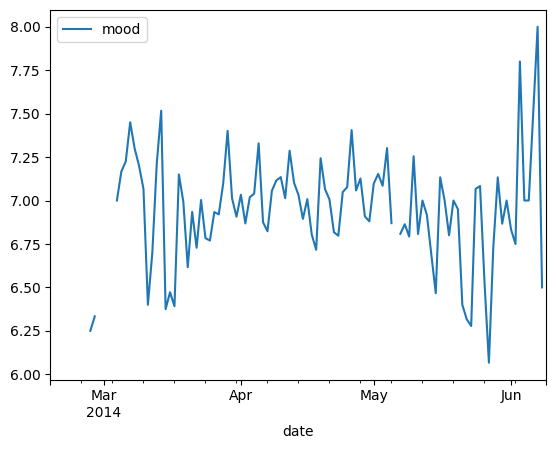

In [100]:
data_monthly = df.loc[:, df.columns != 'id']
grouped_data = data_monthly.groupby(['date']).mean().reset_index()
grouped_data.plot(x='date', y='mood', kind='line')

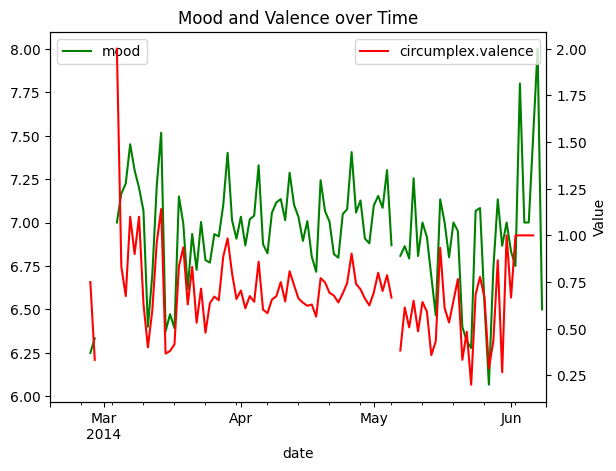

In [101]:

# create plot with secondary axis for 'B' column
ax1 = grouped_data.plot(x='date', y='mood', color='green')
ax2 = ax1.twinx()
grouped_data.plot(x='date', y='circumplex.valence', ax=ax2, color='red')

# add a title and axis labels
plt.title('Mood and Valence over Time')
plt.xlabel('Time')
plt.ylabel('Value')

# show the plot
plt.show()


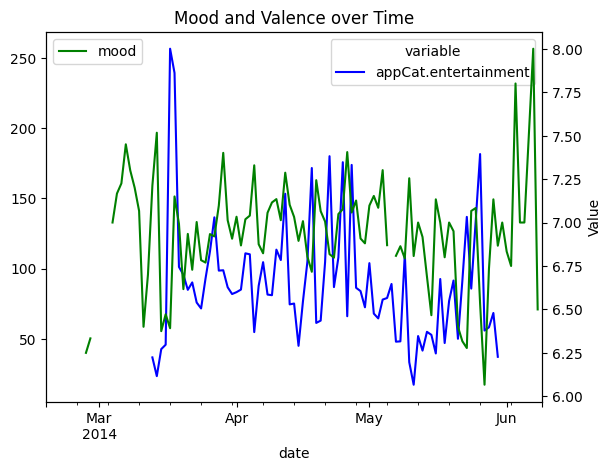

In [102]:
# create plot with secondary axis for 'B' column
ax1 = grouped_data.plot(x='date', y=['appCat.entertainment'], color='blue')
ax2 = ax1.twinx()
grouped_data.plot(x='date', y='mood', ax=ax2, color='green')

# add a title and axis labels
plt.title('Mood and Valence over Time')
plt.xlabel('Time')
plt.ylabel('Value')

# show the plot
plt.show()

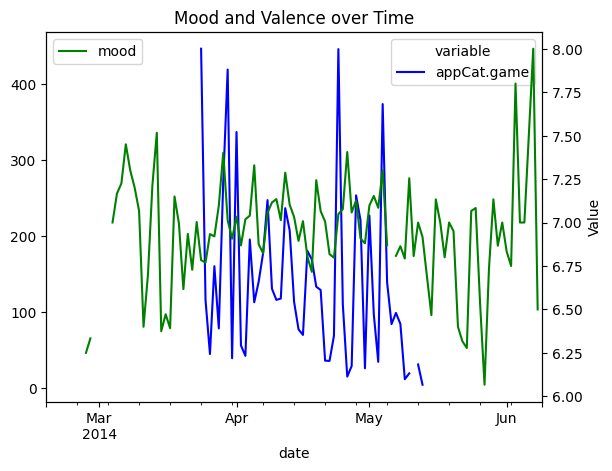

In [103]:
# create plot with secondary axis for 'B' column
ax1 = grouped_data.plot(x='date', y=['appCat.game'], color='blue')
ax2 = ax1.twinx()
grouped_data.plot(x='date', y='mood', ax=ax2, color='green')

# add a title and axis labels
plt.title('Mood and Valence over Time')
plt.xlabel('Time')
plt.ylabel('Value')

# show the plot
plt.show()

In [110]:
# something interesting is that there are some duplicated timestamp need to explore more on that
# there is a negative value on one day throughout a dataset, huge value.
# some values are even missing. 

In [111]:
# # group the data by participant and time, and calculate the mean mood value for each group
# grouped = df.groupby(['variable']).mean().reset_index()

# print(grouped.sort_values('value',ascending=False))

In [112]:
#this shows that poeple have spend time on games more (Duration of usage of game apps (time))

In [113]:
# data_monthly = df[['time','value']]
# # create a new column 'monthly_date' with monthly date values
# data_monthly['monthly_date'] = data_monthly['time'].dt.to_period('M')
# grouped_time_monthly = data_monthly.groupby(['monthly_date']).sum().reset_index()
# print(grouped_time_monthly.sort_values('value',ascending=False))

In [114]:
# this shows in 2014 April the value is highest.

In [115]:
# # # plot a line graph of 'value' vs 'time'
# grouped_time_monthly.plot(x='monthly_date', y='value', kind='line')

# # show the plot
# plt.show()

In [188]:
# sns.heatmap(df.corr());

In [ ]:
# from this we can conclude that valence has an effect on the mood.

# Task 1B


As the insights from Task 1A will have shown, the dataset you analyze contains quite some
noise. Values are sometimes missing, and extreme or incorrect values are seen that are likely
outliers youmay want to remove from the dataset. We will clean the dataset in two steps:

• Apply an approach to remove extreme and incorrect values fromyour dataset. Describe
what your approach is, why you consider that to be a good approach, and describe what
the result of applying the approach is.

• Impute the missing values using two different approaches. Describe the approaches
and study the impact of applying them to your data. Argue which one of the two approacheswould
be most suitable and select that one to formyour cleaned dataset. Also
base yourself on scientific literature for making your choice.
Advanced: The advanced dataset contains a number of time series, select approaches to impute
missing values that are logical for such time series. Also consider what to do with prolonged
periods of missing data in a time series.

In [9]:
df

variable,id,date,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
0,AS14.01,2014-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,AS14.01,2014-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,AS14.01,2014-02-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
3,AS14.01,2014-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
4,AS14.01,2014-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,AS14.33,2014-05-27,0.000000,8.545776,59.382943,62.347000,NaN,NaN,NaN,17.835750,...,NaN,NaN,18.724333,NaN,1.0,-0.600000,0.4,6.2,113.607750,1.0
1969,AS14.33,2014-05-28,0.004202,9.590398,37.238750,43.907571,NaN,NaN,44.738625,27.891895,...,NaN,NaN,5.111000,NaN,1.0,0.000000,1.2,8.2,113.657683,1.0
1970,AS14.33,2014-05-29,0.000000,6.452161,54.388125,68.369000,NaN,NaN,NaN,9.734000,...,0.939000,NaN,1.599500,NaN,1.0,-1.333333,1.0,7.0,118.978033,1.0
1971,AS14.33,2014-05-30,0.035714,14.776845,46.412278,37.174286,NaN,NaN,NaN,10.522000,...,37.594571,2.690667,15.521667,NaN,1.0,-0.800000,-0.4,6.8,86.342245,NaN


In [10]:
df['call'].fillna(0, inplace=True)
df['sms'].fillna(0, inplace=True)
df['activity'].fillna(0, inplace=True)

In [11]:
df.isnull().sum()

variable
id                         0
date                       0
activity                   0
appCat.builtin           778
appCat.communication     790
appCat.entertainment    1123
appCat.finance          1766
appCat.game             1780
appCat.office           1697
appCat.other             853
appCat.social            985
appCat.travel           1544
appCat.unknown          1709
appCat.utilities        1540
appCat.weather          1860
call                       0
circumplex.arousal       705
circumplex.valence       707
mood                     705
screen                   766
sms                        0
dtype: int64

In [12]:
def detect_outliers_zscore(df, cols, threshold=3):
    """
    Replaces outliers in a Pandas DataFrame with NaN values using the Z-score method.

    Parameters:
        df (DataFrame): The DataFrame containing the data to be analyzed.
        cols (list): A list of column names to analyze for outliers.
        threshold (float): The Z-score threshold for outlier detection. Defaults to 3.

    Returns:
        The modified DataFrame with outliers replaced by NaN values.
    """
    outliers = []
    df_copy = df.copy()
    for col in cols:
        # Calculate mean and standard deviation of the column
        mean = np.mean(df_copy[col])
        std = np.std(df_copy[col])

        # Calculate z-scores for each observation in the column
        z_scores = [(x - mean) / std for x in df_copy[col]]
        
        # Identify outliers based on threshold
        col_outliers = [(col, i, df[col][i]) for i, z in enumerate(z_scores) if np.abs(z) > threshold]

        # Add column outliers to list of all outliers
        outliers.extend(col_outliers)

        # Replace outliers with NaN values
        for i, z in enumerate(z_scores):
            if np.abs(z) > threshold:
                df_copy.at[i, col] = np.nan
                
    print(len(outliers))

    return df_copy

In [13]:
# Define the columns to perform outlier detection on
cols_to_check = ['appCat.builtin', 'appCat.communication',
       'appCat.entertainment', 'appCat.finance', 'appCat.game',
       'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel',
       'appCat.unknown', 'appCat.utilities', 'appCat.weather',
       'circumplex.arousal', 'circumplex.valence', 'mood','screen']

In [14]:
df = detect_outliers_zscore(df, cols_to_check,threshold=3)

146


In [15]:
df

variable,id,date,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
0,AS14.01,2014-02-17,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0
1,AS14.01,2014-02-18,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0
2,AS14.01,2014-02-19,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
3,AS14.01,2014-02-20,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
4,AS14.01,2014-02-21,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,AS14.33,2014-05-27,0.000000,8.545776,59.382943,62.347000,NaN,NaN,NaN,17.835750,...,NaN,NaN,18.724333,NaN,1.0,-0.600000,0.4,6.2,113.607750,1.0
1969,AS14.33,2014-05-28,0.004202,9.590398,37.238750,43.907571,NaN,NaN,44.738625,27.891895,...,NaN,NaN,5.111000,NaN,1.0,0.000000,1.2,8.2,113.657683,1.0
1970,AS14.33,2014-05-29,0.000000,6.452161,54.388125,68.369000,NaN,NaN,NaN,9.734000,...,0.939000,NaN,1.599500,NaN,1.0,-1.333333,1.0,7.0,118.978033,1.0
1971,AS14.33,2014-05-30,0.035714,14.776845,46.412278,37.174286,NaN,NaN,NaN,10.522000,...,37.594571,2.690667,15.521667,NaN,1.0,-0.800000,-0.4,6.8,86.342245,0.0


In [16]:
df.isnull().sum()

variable
id                         0
date                       0
activity                   0
appCat.builtin           791
appCat.communication     806
appCat.entertainment    1140
appCat.finance          1770
appCat.game             1783
appCat.office           1699
appCat.other             870
appCat.social            993
appCat.travel           1548
appCat.unknown          1712
appCat.utilities        1550
appCat.weather          1862
call                       0
circumplex.arousal       707
circumplex.valence       721
mood                     718
screen                   784
sms                        0
dtype: int64

In [17]:
from sklearn.impute import KNNImputer
# Define a function to apply KNN imputation
def knn_imputation(df, column_name):
    # Create a copy of the dataframe
    df_imputed = df.copy()

    # Create a KNN imputer object
    imputer = KNNImputer(n_neighbors=5)

    # Fit and transform the data
    df_imputed[column_name] = imputer.fit_transform(df[[column_name]])

    return df_imputed

In [18]:
df_m1 = df.copy()
for column in df_m1.columns:
    print(column)
    temp = df_m1[column].isnull().any()
    if temp == True:
        df_imputed = knn_imputation(df_m1, column)
        df_m1[column] = df_imputed[column]
    else:
        continue

id
date
activity
appCat.builtin
appCat.communication
appCat.entertainment
appCat.finance
appCat.game
appCat.office
appCat.other
appCat.social
appCat.travel
appCat.unknown
appCat.utilities
appCat.weather
call
circumplex.arousal
circumplex.valence
mood
screen
sms


In [19]:
df_m1

variable,id,date,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
0,AS14.01,2014-02-17,0.000000,19.643439,42.443546,78.913820,23.584634,134.866284,35.740971,17.601603,...,45.595390,48.941521,13.369366,19.508134,1.0,-0.107096,0.694089,7.017357,78.622418,0.0
1,AS14.01,2014-02-18,0.000000,19.643439,42.443546,78.913820,23.584634,134.866284,35.740971,17.601603,...,45.595390,48.941521,13.369366,19.508134,1.0,-0.107096,0.694089,7.017357,78.622418,0.0
2,AS14.01,2014-02-19,0.000000,19.643439,42.443546,78.913820,23.584634,134.866284,35.740971,17.601603,...,45.595390,48.941521,13.369366,19.508134,1.0,-0.107096,0.694089,7.017357,78.622418,1.0
3,AS14.01,2014-02-20,0.000000,19.643439,42.443546,78.913820,23.584634,134.866284,35.740971,17.601603,...,45.595390,48.941521,13.369366,19.508134,1.0,-0.107096,0.694089,7.017357,78.622418,1.0
4,AS14.01,2014-02-21,0.000000,19.643439,42.443546,78.913820,23.584634,134.866284,35.740971,17.601603,...,45.595390,48.941521,13.369366,19.508134,0.0,-0.107096,0.694089,7.017357,78.622418,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,AS14.33,2014-05-27,0.000000,8.545776,59.382943,62.347000,23.584634,134.866284,35.740971,17.835750,...,45.595390,48.941521,18.724333,19.508134,1.0,-0.600000,0.400000,6.200000,113.607750,1.0
1969,AS14.33,2014-05-28,0.004202,9.590398,37.238750,43.907571,23.584634,134.866284,44.738625,27.891895,...,45.595390,48.941521,5.111000,19.508134,1.0,0.000000,1.200000,8.200000,113.657683,1.0
1970,AS14.33,2014-05-29,0.000000,6.452161,54.388125,68.369000,23.584634,134.866284,35.740971,9.734000,...,0.939000,48.941521,1.599500,19.508134,1.0,-1.333333,1.000000,7.000000,118.978033,1.0
1971,AS14.33,2014-05-30,0.035714,14.776845,46.412278,37.174286,23.584634,134.866284,35.740971,10.522000,...,37.594571,2.690667,15.521667,19.508134,1.0,-0.800000,-0.400000,6.800000,86.342245,0.0


In [20]:
for column in df_m1.columns:
    temp = df_m1[column].isnull().any()
    if temp == True:
        print(column)

In [21]:
df_m2 = df.copy()
df_m2 = df_m2.set_index('date')
# Imputing with linear interpolation
df_m2 = df_m2.interpolate(method='time',limit_direction='both')

df_m2

variable,id,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
date,,,,,,,,,,,,,,,,,,,,
2014-02-17,AS14.01,0.000000,4.913900,46.672273,36.754000,8.038400,31.647,17.086000,46.723600,33.491833,81.783286,25.749571,13.062000,3.020000,1.0,-0.250000,0.75,6.25,55.066533,0.0
2014-02-18,AS14.01,0.000000,4.913900,46.672273,36.754000,8.038400,31.647,17.086000,46.723600,33.491833,81.783286,25.749571,13.062000,3.020000,1.0,-0.250000,0.75,6.25,55.066533,0.0
2014-02-19,AS14.01,0.000000,4.913900,46.672273,36.754000,8.038400,31.647,17.086000,46.723600,33.491833,81.783286,25.749571,13.062000,3.020000,1.0,-0.250000,0.75,6.25,55.066533,1.0
2014-02-20,AS14.01,0.000000,4.913900,46.672273,36.754000,8.038400,31.647,17.086000,46.723600,33.491833,81.783286,25.749571,13.062000,3.020000,1.0,-0.250000,0.75,6.25,55.066533,1.0
2014-02-21,AS14.01,0.000000,4.913900,46.672273,36.754000,8.038400,31.647,17.086000,46.723600,33.491833,81.783286,25.749571,13.062000,3.020000,0.0,-0.250000,0.75,6.25,55.066533,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-05-27,AS14.33,0.000000,8.545776,59.382943,62.347000,21.777667,4.693,87.634312,17.835750,50.259100,64.526444,51.333000,18.724333,16.395500,1.0,-0.600000,0.40,6.20,113.607750,1.0
2014-05-28,AS14.33,0.004202,9.590398,37.238750,43.907571,21.777667,4.693,44.738625,27.891895,99.281685,68.421500,35.118889,5.111000,15.360083,1.0,0.000000,1.20,8.20,113.657683,1.0
2014-05-29,AS14.33,0.000000,6.452161,54.388125,68.369000,21.777667,4.693,44.738625,9.734000,198.880222,0.939000,18.904778,1.599500,15.360083,1.0,-1.333333,1.00,7.00,118.978033,1.0


In [22]:
for column in df_m2.columns:
    temp = df_m2[column].isnull().any()
    if temp == True:
        print(column)

In [9]:
# # rename the other columns
# df = df.rename(columns={
#     'date': 'ds',
#     'mood': 'y',
# })

In [10]:
# df = df.set_index(['ds', 'y']).sort_index().reset_index()
# df

In [11]:
# df.info()

In [12]:
# df['ds'] = df['ds'].dt.to_timestamp(None)

In [13]:
# # Add seasonality
# model = Prophet()
# # Fit the model on the training dataset
# model.fit(df)

In [14]:
# forecast = model.predict(df)
# performance = pd.merge(df, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')

In [15]:
# performance

In [16]:
# # Create an anomaly indicator
# performance['anomaly'] = performance.apply(lambda rows: 1 if ((rows.y<rows.yhat_lower)|(rows.y>rows.yhat_upper)) else 0, axis = 1)
# # Check the number of anomalies
# performance['anomaly'].value_counts()

In [17]:
# performance

In [18]:
# # Take a look at the anomalies
# anomalies = performance[performance['anomaly']==1].sort_values(by='ds')
# anomalies

In [19]:
# Visualize the anomalies
# sns.scatterplot(x='ds', y='y', data=performance, hue='anomaly')

In [31]:
# import pandas as pd
# from sklearn.impute import KNNImputer
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# from sklearn.linear_model import LinearRegression
# import numpy as np

# # Define a function to apply multiple imputation
# def multiple_imputation(df, column_name):
#     # Create a copy of the dataframe
#     df_imputed = df.copy()

#     # Create an imputer object
#     imputer = IterativeImputer(random_state=0)

#     # Fit and transform the data
#     df_imputed[column_name] = imputer.fit_transform(df[[column_name]])

#     return df_imputed

# # Define a function to apply regression imputation
# def regression_imputation(df, column_name):
#     # Create a copy of the dataframe
#     df_imputed = df.copy()

#     # Create a linear regression object
#     lr = LinearRegression()

#     # Split the dataset into observed and missing values
#     observed = df_imputed.loc[df_imputed[column_name].notnull()]
#     missing = df_imputed.loc[df_imputed[column_name].isnull()]

#     # cols_to_delete = observed.columns[observed.isnull().any()]
#     # observed.drop(cols_to_delete, axis = 1, inplace = True)
#     # print(observed.columns)
#     # Fit the regression model on the observed data
#     lr.fit(observed[['id', 'date']], observed[column_name])

#     # Predict the missing values using the regression model
#     df_imputed.loc[df_imputed[column_name].isnull(), column_name] = lr.predict(missing.drop(column_name, axis=1))

#     return df_imputed

# Define a function to apply KNN imputation
# def knn_imputation(df, column_name):
#     # Create a copy of the dataframe
#     df_imputed = df.copy()

#     # Create a KNN imputer object
#     imputer = KNNImputer(n_neighbors=5)

#     # Fit and transform the data
#     df_imputed[column_name] = imputer.fit_transform(df[[column_name]])

#     return df_imputed

# # Define a function to apply hot-deck imputation
# def hot_deck_imputation(df, column_name):
#     # Create a copy of the dataframe
#     df_imputed = df.copy()

#     # Create a donor pool of observed values
#     donor_pool = df_imputed.loc[df_imputed[column_name].notnull()]

#     # Loop through the missing values and impute with values from the donor pool
#     for i, row in df_imputed.iterrows():
#         if pd.isnull(row[column_name]):
#             donor = donor_pool.sample()
#             df_imputed.at[i, column_name] = donor[column_name].values[0]

#     return df_imputed

# # Define a function to apply mean imputation
# def mean_imputation(df, column_name):
#     # Create a copy of the dataframe
#     df_imputed = df.copy()

#     # Calculate the mean of the observed values
#     mean_value = df_imputed.loc[df_imputed[column_name].notnull(), column_name].mean()

#     # Impute the missing values with the mean
#     df_imputed[column_name].fillna(mean_value, inplace=True)

#     return df_imputed


# Apply all the imputation methods to the 'A' column
# df_imputed = multiple_imputation(df, 'call') # failed
# df_imputed = regression_imputation(df, 'call') # try again
# df_imputed = knn_imputation(df, 'call') #failed
# df_imputed = hot_deck_imputation(df, 'call')  #failed
# df_imputed = mean_imputation(df, 'call')  #failed

# Task 1C

In [23]:
df_m1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype    
---  ------                --------------  -----    
 0   id                    1973 non-null   object   
 1   date                  1973 non-null   period[D]
 2   activity              1973 non-null   float64  
 3   appCat.builtin        1973 non-null   float64  
 4   appCat.communication  1973 non-null   float64  
 5   appCat.entertainment  1973 non-null   float64  
 6   appCat.finance        1973 non-null   float64  
 7   appCat.game           1973 non-null   float64  
 8   appCat.office         1973 non-null   float64  
 9   appCat.other          1973 non-null   float64  
 10  appCat.social         1973 non-null   float64  
 11  appCat.travel         1973 non-null   float64  
 12  appCat.unknown        1973 non-null   float64  
 13  appCat.utilities      1973 non-null   float64  
 14  appCat.weather        1973 non-null   fl

In [24]:
df_m1.drop('id',axis=1, inplace=True)
df_m1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype    
---  ------                --------------  -----    
 0   date                  1973 non-null   period[D]
 1   activity              1973 non-null   float64  
 2   appCat.builtin        1973 non-null   float64  
 3   appCat.communication  1973 non-null   float64  
 4   appCat.entertainment  1973 non-null   float64  
 5   appCat.finance        1973 non-null   float64  
 6   appCat.game           1973 non-null   float64  
 7   appCat.office         1973 non-null   float64  
 8   appCat.other          1973 non-null   float64  
 9   appCat.social         1973 non-null   float64  
 10  appCat.travel         1973 non-null   float64  
 11  appCat.unknown        1973 non-null   float64  
 12  appCat.utilities      1973 non-null   float64  
 13  appCat.weather        1973 non-null   float64  
 14  call                  1973 non-null   fl

In [25]:
group_m1 = df_m1.groupby(['date']).mean().reset_index()
group_m1

variable,date,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
0,2014-02-17,0.000000,19.643439,42.443546,78.91382,23.584634,134.866284,35.740971,17.601603,68.731995,45.595390,48.941521,13.369366,19.508134,0.782609,-0.107096,0.694089,7.017357,78.622418,0.391304
1,2014-02-18,0.000000,19.643439,42.443546,78.91382,23.584634,134.866284,35.740971,17.601603,68.731995,45.595390,48.941521,13.369366,19.508134,0.904762,-0.107096,0.694089,7.017357,78.622418,0.285714
2,2014-02-19,0.000000,19.643439,42.443546,78.91382,23.584634,134.866284,35.740971,17.601603,68.731995,45.595390,48.941521,13.369366,19.508134,0.950000,-0.107096,0.694089,7.017357,78.622418,0.550000
3,2014-02-20,0.000000,19.643439,42.443546,78.91382,23.584634,134.866284,35.740971,17.601603,68.731995,45.595390,48.941521,13.369366,19.508134,0.944444,-0.107096,0.694089,7.017357,78.622418,0.444444
4,2014-02-21,0.000000,19.643439,42.443546,78.91382,23.584634,134.866284,35.740971,17.601603,68.731995,45.595390,48.941521,13.369366,19.508134,0.900000,-0.107096,0.694089,7.017357,78.622418,0.650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2014-06-05,0.046218,13.994216,25.914081,78.91382,23.584634,134.866284,35.740971,9.472000,19.107111,75.245667,48.941521,13.369366,19.508134,1.000000,0.000000,1.000000,7.000000,40.196424,0.000000
109,2014-06-06,0.062190,6.568736,38.884636,78.91382,23.584634,134.866284,35.740971,9.103500,68.731995,45.595390,48.941521,2.072000,19.508134,1.000000,0.500000,1.000000,7.500000,47.953193,0.000000
110,2014-06-07,0.000000,125.687450,27.257963,78.91382,23.584634,134.866284,35.740971,6.214000,53.425000,45.595390,48.941521,13.369366,19.508134,0.000000,-1.000000,0.694089,8.000000,128.613442,1.000000
111,2014-06-08,0.060806,19.521611,42.443546,78.91382,23.584634,134.866284,35.740971,9.034500,190.760000,45.595390,48.941521,13.369366,19.508134,0.000000,-1.500000,1.000000,6.500000,161.599714,0.000000


In [26]:
group_m1.set_index('date', inplace=True)

In [27]:
corr_matrix = group_m1.corr()
corr_pairs = []
for i in range(len(corr_matrix)):
    for j in range(i+1, len(corr_matrix)):
        if abs(corr_matrix.iloc[i,j]) > 0.3:
            corr_pairs.append((corr_matrix.index[i], corr_matrix.columns[j], corr_matrix.iloc[i,j]))

In [28]:
corr_pairs

[('activity', 'call', -0.3762447916259194),
 ('appCat.builtin', 'circumplex.arousal', -0.3479338304007761),
 ('appCat.builtin', 'mood', 0.4210735003214348),
 ('appCat.builtin', 'sms', 0.32444578226309334),
 ('appCat.entertainment', 'appCat.office', 0.3577840407233536),
 ('appCat.social', 'circumplex.arousal', -0.4657389336099871),
 ('appCat.social', 'mood', -0.36439323566863185),
 ('appCat.social', 'screen', 0.47929141677191484),
 ('call', 'circumplex.arousal', 0.451486872457901),
 ('circumplex.valence', 'mood', 0.6086157875463247)]

<Axes: xlabel='variable', ylabel='variable'>

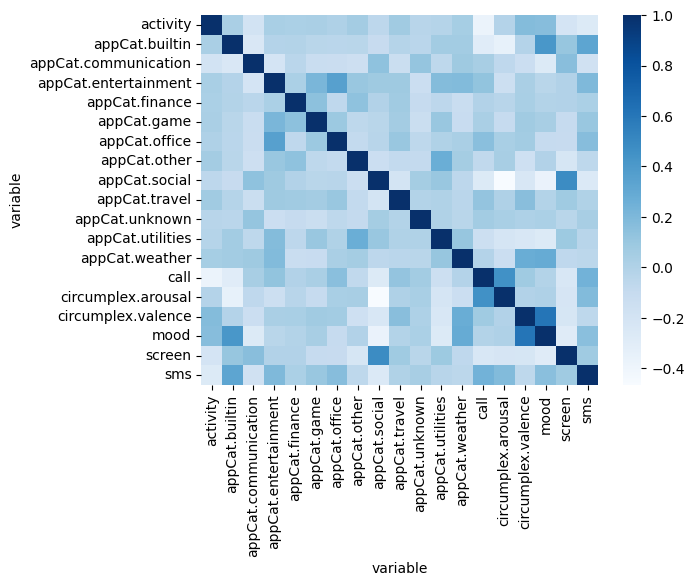

In [29]:
sns.heatmap(group_m1.corr(),cmap='Blues')

In [30]:
# group_m1

In [31]:
# group_m1 = group_m1.set_index('date')

In [32]:
group_m1

variable,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
date,,,,,,,,,,,,,,,,,,,
2014-02-17,0.000000,19.643439,42.443546,78.91382,23.584634,134.866284,35.740971,17.601603,68.731995,45.595390,48.941521,13.369366,19.508134,0.782609,-0.107096,0.694089,7.017357,78.622418,0.391304
2014-02-18,0.000000,19.643439,42.443546,78.91382,23.584634,134.866284,35.740971,17.601603,68.731995,45.595390,48.941521,13.369366,19.508134,0.904762,-0.107096,0.694089,7.017357,78.622418,0.285714
2014-02-19,0.000000,19.643439,42.443546,78.91382,23.584634,134.866284,35.740971,17.601603,68.731995,45.595390,48.941521,13.369366,19.508134,0.950000,-0.107096,0.694089,7.017357,78.622418,0.550000
2014-02-20,0.000000,19.643439,42.443546,78.91382,23.584634,134.866284,35.740971,17.601603,68.731995,45.595390,48.941521,13.369366,19.508134,0.944444,-0.107096,0.694089,7.017357,78.622418,0.444444
2014-02-21,0.000000,19.643439,42.443546,78.91382,23.584634,134.866284,35.740971,17.601603,68.731995,45.595390,48.941521,13.369366,19.508134,0.900000,-0.107096,0.694089,7.017357,78.622418,0.650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-06-05,0.046218,13.994216,25.914081,78.91382,23.584634,134.866284,35.740971,9.472000,19.107111,75.245667,48.941521,13.369366,19.508134,1.000000,0.000000,1.000000,7.000000,40.196424,0.000000
2014-06-06,0.062190,6.568736,38.884636,78.91382,23.584634,134.866284,35.740971,9.103500,68.731995,45.595390,48.941521,2.072000,19.508134,1.000000,0.500000,1.000000,7.500000,47.953193,0.000000
2014-06-07,0.000000,125.687450,27.257963,78.91382,23.584634,134.866284,35.740971,6.214000,53.425000,45.595390,48.941521,13.369366,19.508134,0.000000,-1.000000,0.694089,8.000000,128.613442,1.000000


In [33]:
temp_m1 = group_m1[['mood','circumplex.valence','appCat.social','appCat.builtin']]

In [34]:
temp_m1

variable,mood,circumplex.valence,appCat.social,appCat.builtin
date,,,,
2014-02-17,7.017357,0.694089,68.731995,19.643439
2014-02-18,7.017357,0.694089,68.731995,19.643439
2014-02-19,7.017357,0.694089,68.731995,19.643439
2014-02-20,7.017357,0.694089,68.731995,19.643439
2014-02-21,7.017357,0.694089,68.731995,19.643439
...,...,...,...,...
2014-06-05,7.000000,1.000000,19.107111,13.994216
2014-06-06,7.500000,1.000000,68.731995,6.568736
2014-06-07,8.000000,0.694089,53.425000,125.687450


In [102]:
# create lagged and rolling features
temp_m1['mood_lag1'] = temp_m1['mood'].shift(1)
temp_m1['mood_lag2'] = temp_m1['mood'].shift(2)
temp_m1['mood_lag3'] = temp_m1['mood'].shift(3)
# temp_m1['builtin_lag1'] = temp_m1['appCat.builtin'].shift(1)
# temp_m1['builtin_lag2'] = temp_m1['appCat.builtin'].shift(2)
# temp_m1['social_lag1'] = temp_m1['appCat.social'].shift(1)
# temp_m1['social_lag2'] = temp_m1['appCat.social'].shift(2)
# temp_m1['valence_lag1'] = temp_m1['circumplex.valence'].shift(1)

# temp_m1['circumplex.valence_roll'] = temp_m1['circumplex.valence'].rolling(window=3).mean()
temp_m1['appCat.social_roll'] = temp_m1['appCat.social'].rolling(window=3).mean()
temp_m1['mood_roll'] = temp_m1['mood'].rolling(window=7).mean()
# temp_m1['appCat.builtin'] = temp_m1['appCat.builtin'].rolling(window=5).mean()

In [103]:
# temp_m1[2:].corr()
corr_matrix = temp_m1[3:].corr()
corr_pairs = []
for i in range(len(corr_matrix)):
    for j in range(i+1, len(corr_matrix)):
        if abs(corr_matrix.iloc[i,j]) > 0.4:
            corr_pairs.append((corr_matrix.index[i], corr_matrix.columns[j], corr_matrix.iloc[i,j]))

In [104]:
corr_pairs

[('mood', 'circumplex.valence', 0.6086193652545033),
 ('mood', 'appCat.builtin', 0.4210067008434954),
 ('mood', 'appCat.social_roll', -0.43327851713187976),
 ('mood', 'mood_roll', 0.5388716561712151),
 ('circumplex.valence', 'appCat.social_roll', -0.4086259141962785),
 ('appCat.social', 'appCat.social_roll', 0.6794786746982647),
 ('mood_lag1', 'mood_roll', 0.5477157750904852),
 ('mood_lag2', 'mood_roll', 0.5470949465416334),
 ('mood_lag3', 'mood_roll', 0.49212006040873224)]

In [105]:
temp_m1.columns

Index(['mood', 'circumplex.valence', 'appCat.social', 'appCat.builtin',
       'mood_lag1', 'mood_lag2', 'mood_lag3', 'appCat.social_roll',
       'mood_roll', 'seasonality'],
      dtype='object', name='variable')

In [106]:
temp_m1

variable,mood,circumplex.valence,appCat.social,appCat.builtin,mood_lag1,mood_lag2,mood_lag3,appCat.social_roll,mood_roll,seasonality
date,,,,,,,,,,
2014-02-17,7.017357,0.694089,68.731995,19.643439,NaN,NaN,NaN,NaN,NaN,-0.077586
2014-02-18,7.017357,0.694089,68.731995,19.643439,7.017357,NaN,NaN,NaN,NaN,0.062447
2014-02-19,7.017357,0.694089,68.731995,19.643439,7.017357,7.017357,NaN,68.731995,NaN,0.104524
2014-02-20,7.017357,0.694089,68.731995,19.643439,7.017357,7.017357,7.017357,68.731995,NaN,-0.183597
2014-02-21,7.017357,0.694089,68.731995,19.643439,7.017357,7.017357,7.017357,68.731995,NaN,-0.217686
...,...,...,...,...,...,...,...,...,...,...
2014-06-05,7.000000,1.000000,19.107111,13.994216,7.000000,7.800000,6.750000,24.541370,7.035714,0.014524
2014-06-06,7.500000,1.000000,68.731995,6.568736,7.000000,7.000000,7.800000,35.024535,7.126190,-0.098750
2014-06-07,8.000000,0.694089,53.425000,125.687450,7.500000,7.000000,7.000000,47.088035,7.269048,0.002369


In [107]:
graph_data = temp_m1.copy()

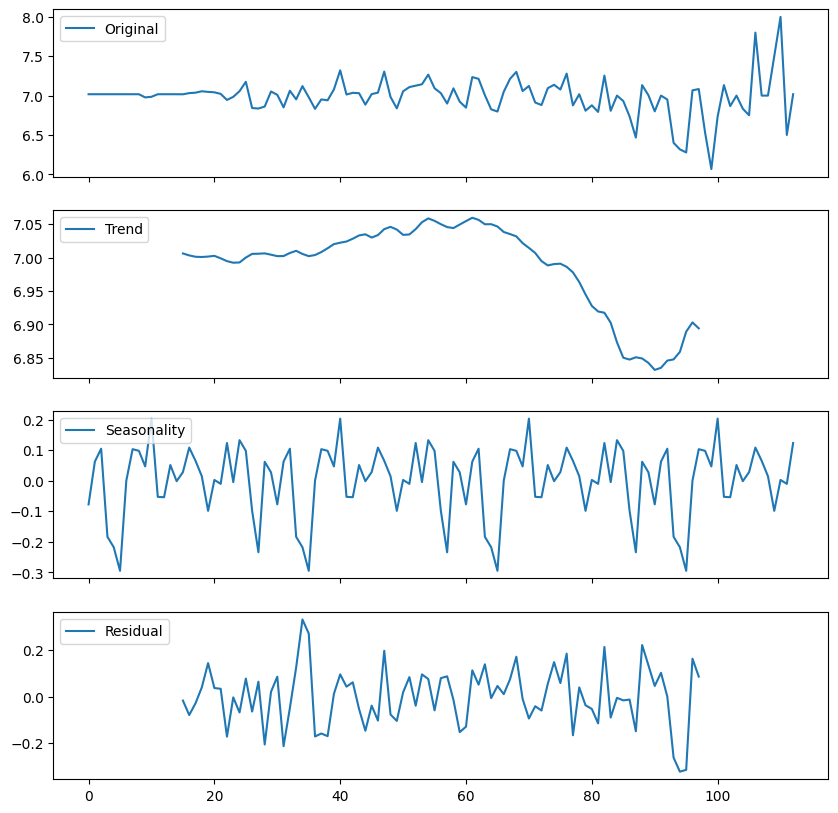

In [108]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
# Extract the seasonality using seasonal decomposition
# decomp = sm.tsa.seasonal_decompose(graph_data['mood'], model='additive', period=30)


# Decompose the time series into trend, seasonality, and residual components
decomposition = seasonal_decompose(graph_data['mood'], model='additive', period=30)
graph_data = graph_data.reset_index()
graph_data['date'] = graph_data['date'].astype(str)

# Plot the original time series and the trend, seasonality, and residual components
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 10), sharex=True)
ax[0].plot(graph_data.index, graph_data['mood'], label='Original')
ax[0].legend(loc='upper left')
ax[1].plot(graph_data.index, decomposition.trend, label='Trend')
ax[1].legend(loc='upper left')
ax[2].plot(graph_data.index, decomposition.seasonal, label='Seasonality')
ax[2].legend(loc='upper left')
ax[3].plot(graph_data.index, decomposition.resid, label='Residual')
ax[3].legend(loc='upper left')
plt.show()

In [109]:
temp_m1['seasonality'] = decomposition.seasonal

In [110]:
temp_m2 = temp_m1[3:]

In [121]:
#Golab Measures dataframe
df_measure = pd.DataFrame(columns=["Name_of_algo","MSE","MAPE","MAE"])

In [122]:
# Baseline

# Split the data into training and testing sets
# train_size = int(0.8 * len(temp_m2))
train_data = temp_m2[:-5]
test_data = temp_m2[-5:]

# Define the features and target variable
features = ['mood_roll']
target = 'mood'

# print(train_data)
# Prepare the data for random forest
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]


# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, X_test)
print("Mean squared error: ", mse)

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, X_test) * 100
print("MAPE: {:.2f}%".format(mape))

# Calculate the MAE between the predicted values and the actual values
mae = mean_absolute_error(y_test, X_test)
print("MAE:", mae)

new_row = ['Baseline', mse, mape, mae]
df_measure.loc[len(df_measure)] = new_row
print(df_measure)

Mean squared error:  0.2508904152685763
MAPE: 5.84%
MAE: 0.4208339973439573
  Name_of_algo      MSE      MAPE       MAE
0     Baseline  0.25089  5.836502  0.420834


In [123]:
from sklearn.ensemble import RandomForestRegressor

# Split the data into training and testing sets
train_data = temp_m2[:-5]
test_data = temp_m2[-5:]

# Define the features and target variable
features = ['circumplex.valence', 'appCat.social', 'appCat.builtin',
       'mood_lag1', 'mood_lag2', 'mood_lag3', 'appCat.social_roll','seasonality']
target = 'mood'

# Prepare the data for random forest
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Train the random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred_rf)
print("Mean squared error: ", mse)

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred_rf) * 100
print("MAPE: {:.2f}%".format(mape))

# Calculate the MAE between the predicted values and the actual values
mae = mean_absolute_error(y_test, y_pred_rf)
print("MAE:", mae)

new_row = ['Random Forest', mse, mape, mae]
df_measure.loc[len(df_measure)] = new_row
print(df_measure)


Mean squared error:  0.27593354440021955
MAPE: 5.54%
MAE: 0.4095210128157685
    Name_of_algo       MSE      MAPE       MAE
0       Baseline  0.250890  5.836502  0.420834
1  Random Forest  0.275934  5.539541  0.409521


In [124]:
from sklearn.tree import DecisionTreeRegressor


# create an instance of Decision Tree Regressor with desired parameters
dt = DecisionTreeRegressor(max_depth=5, random_state=42)

# train the model on the training data
dt.fit(X_train, y_train)

# make predictions on the test data
y_pred_dt = dt.predict(X_test)


# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred_dt)
print("Mean squared error: ", mse)

# Calculate MAPE
mape = mape_overall = mean_absolute_percentage_error(y_test, y_pred_dt) * 100
print("MAPE: {:.2f}%".format(mape))

# Calculate the MAE between the predicted values and the actual values
mae = mean_absolute_error(y_test, y_pred_dt)
print("MAE:", mae)

new_row = ['Decision Tree', mse, mape, mae]
df_measure.loc[len(df_measure)] = new_row
print(df_measure)


Mean squared error:  0.308934156088126
MAPE: 5.59%
MAE: 0.4105889167044694
    Name_of_algo       MSE      MAPE       MAE
0       Baseline  0.250890  5.836502  0.420834
1  Random Forest  0.275934  5.539541  0.409521
2  Decision Tree  0.308934  5.592587  0.410589


In [125]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Load your time series data and split it into training and testing sets

# Initialize an SVM model
svm_model = SVR(kernel='rbf', C=1e3, gamma=0.1)

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred_svm = svm_model.predict(X_test)

# Calculate the mean squared error (MSE) between the predicted values and the actual values
mse = mean_squared_error(y_test, y_pred_svm)
print("MSE:", mse)

# Calculate MAPE
mape = mape_overall = mean_absolute_percentage_error(y_test, y_pred_svm) * 100
print("MAPE: {:.2f}%".format(mape))

# Calculate the MAE between the predicted values and the actual values
mae = mean_absolute_error(y_test, y_pred_svm)
print("MAE:", mae)

new_row = ['SVM', mse, mape, mae]
df_measure.loc[len(df_measure)] = new_row
print(df_measure)


MSE: 0.3275180012083583
MAPE: 5.88%
MAE: 0.43883385686337667
    Name_of_algo       MSE      MAPE       MAE
0       Baseline  0.250890  5.836502  0.420834
1  Random Forest  0.275934  5.539541  0.409521
2  Decision Tree  0.308934  5.592587  0.410589
3            SVM  0.327518  5.880797  0.438834


In [126]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import numpy as np

# Load your time series data and split it into training and testing sets

# Reshape the training and testing data into the format expected by the LSTM
# Define the features and target variable
features = ['circumplex.valence','appCat.social','appCat.builtin','seasonality']
target = 'mood'
# Prepare the data for random forest
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]
# In this example, we assume that each sample in the time series has a single feature
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Initialize an LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(units=1))

# Compile the model with the appropriate loss function and optimizer
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model on the training data
lstm_model.fit(X_train, y_train, epochs=100, batch_size=32)

# Use the model to make predictions on the testing data
y_pred_lstm = lstm_model.predict(X_test)

# Reshape the predicted values and actual values back to their original shape
y_pred_lstm = np.reshape(y_pred_lstm, (y_pred_lstm.shape[0],))
y_test = np.reshape(y_test, (y_test.shape[0],))

# Calculate the mean squared error (MSE) between the predicted values and the actual values
mse = mean_squared_error(y_test, y_pred_lstm)
print("MSE:", mse)

# Calculate MAPE
mape = mape_overall = mean_absolute_percentage_error(y_test, y_pred_lstm) * 100
print("MAPE: {:.2f}%".format(mape))

# Calculate the MAE between the predicted values and the actual values
mae = mean_absolute_error(y_test, y_pred_lstm)
print("MAE:", mae)

new_row = ['LSTM', mse, mape, mae]
df_measure.loc[len(df_measure)] = new_row
print(df_measure)

Epoch 1/100
4/4 [==============================] - 4s 7ms/step - loss: 45.5923
Epoch 2/100
4/4 [==============================] - 0s 7ms/step - loss: 38.9926
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 32.5003
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 25.9408
Epoch 5/100
4/4 [==============================] - 0s 7ms/step - loss: 19.3433
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 13.0182
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 7.5652
Epoch 8/100
4/4 [==============================] - 0s 6ms/step - loss: 3.5061
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 1.1029
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 0.1359
Epoch 11/100
4/4 [==============================] - 0s 5ms/step - loss: 0.1298
Epoch 12/100
4/4 [==============================] - 0s 5ms/step - loss: 0.3692
Epoch 13/100
4/4 [==============================] - 0s 

In [127]:
y_pred_arimax

2014-06-09    6.998435
Freq: D, dtype: float64

In [128]:
import statsmodels.api as sm

# set the rolling window size
window_size = 105

# split data into endogenous and exogenous variables
y = temp_m2['mood']
X = temp_m2[['circumplex.valence','appCat.social','appCat.builtin']]

# Initialize lists to store the MSEs and predictions
# mses = []
# mapes = []
# maes = []
predictions = []


# iterate over the last 5 rows of the dataset
for i in range(len(y)-5, len(y)):

    # define the training and testing sets for this iteration
    y_train, y_test = y[i-window_size:i], y[i:i+1]
    X_train, X_test = X[i-window_size:i], X[i:i+1]

    # fit the ARIMAX model
    arimax_model = sm.tsa.ARIMA(endog=y_train, order=(3,1,3), exog=X_train).fit()

    # make a prediction for the next value
    y_pred_arimax = arimax_model.predict(start=y_test.index[0], end=y_test.index[-1], exog=X_test)
    print(y_pred_arimax)
    predictions.append(y_pred_arimax)
    # print the predicted value
    # print("Predicted mood at date {}: {:.2f}".format(y_test.index[0], y_pred_arimax[0]))

# Calculate the MSE for this window
mse = mean_squared_error(y[-5:], predictions)
# mses.append(mse)
print("MSE: {:.2f}".format(mse))

# Calculate MAPE
mape = mean_absolute_percentage_error(y[-5:], predictions) * 100
# mapes.append(mape)
print("MAPE: {:.2f}%".format(mape))

# Calculate the MAE between the predicted values and the actual values
mae = mean_absolute_error(y[-5:], predictions)
# maes.append(mae)
print("MAE:", mae)

new_row = ['ARIMAX', mse, mape, mae]
df_measure.loc[len(df_measure)] = new_row
print(df_measure)



2014-06-05    7.566756
Freq: D, dtype: float64
2014-06-06    6.83905
Freq: D, dtype: float64
2014-06-07    7.585492
Freq: D, dtype: float64
2014-06-08    7.291797
Freq: D, dtype: float64
2014-06-09    6.998435
Freq: D, dtype: float64
MSE: 0.31
MAPE: 6.91%
MAE: 0.4905864300244932
    Name_of_algo       MSE      MAPE       MAE
0       Baseline  0.250890  5.836502  0.420834
1  Random Forest  0.275934  5.539541  0.409521
2  Decision Tree  0.308934  5.592587  0.410589
3            SVM  0.327518  5.880797  0.438834
4           LSTM  0.404292  6.133122  0.459920
5         ARIMAX  0.311437  6.908331  0.490586


In [129]:
df_measure.to_csv('Measures.csv', index= False)